##  Sum of bias-variance tradeoffs
This notebook contains the relevant code for the following figures in the paper "*Early stopping in deep networks: Double descent and how to eliminate it*":

- Figure 2

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

save_outputs = False

In [2]:
def risk(thetas,sigmas,stepsize,k,sigma_noise,n):
    out =  sigmas**2*(1-stepsize*sigmas**2)**(2*k) @ thetas**2
    out += np.sum( (sigma_noise**2/n)*(1-(1-stepsize*sigmas**2)**k)**2 )
    out += sigma_noise**2
    return out

def res_to_mtx(losses,filename):
    ks = [i for i in range(len(losses[0]))]
    A = [np.array(ks)]
    A += losses
    A = np.vstack( A ).T
    print(A.shape)
    np.savetxt(filename, A, delimiter=' ')

def savemtx_for_logplot(A,filename = "exp.dat"):
    ind = sorted(list(set([int(i) for i in np.geomspace(1, len(A[0])-1 ,num=700)])))
    A = [ [a[i] for i in ind]  for a in A]
    X = np.array([ind] + A)
    np.savetxt(filename, X.T, delimiter=' ')

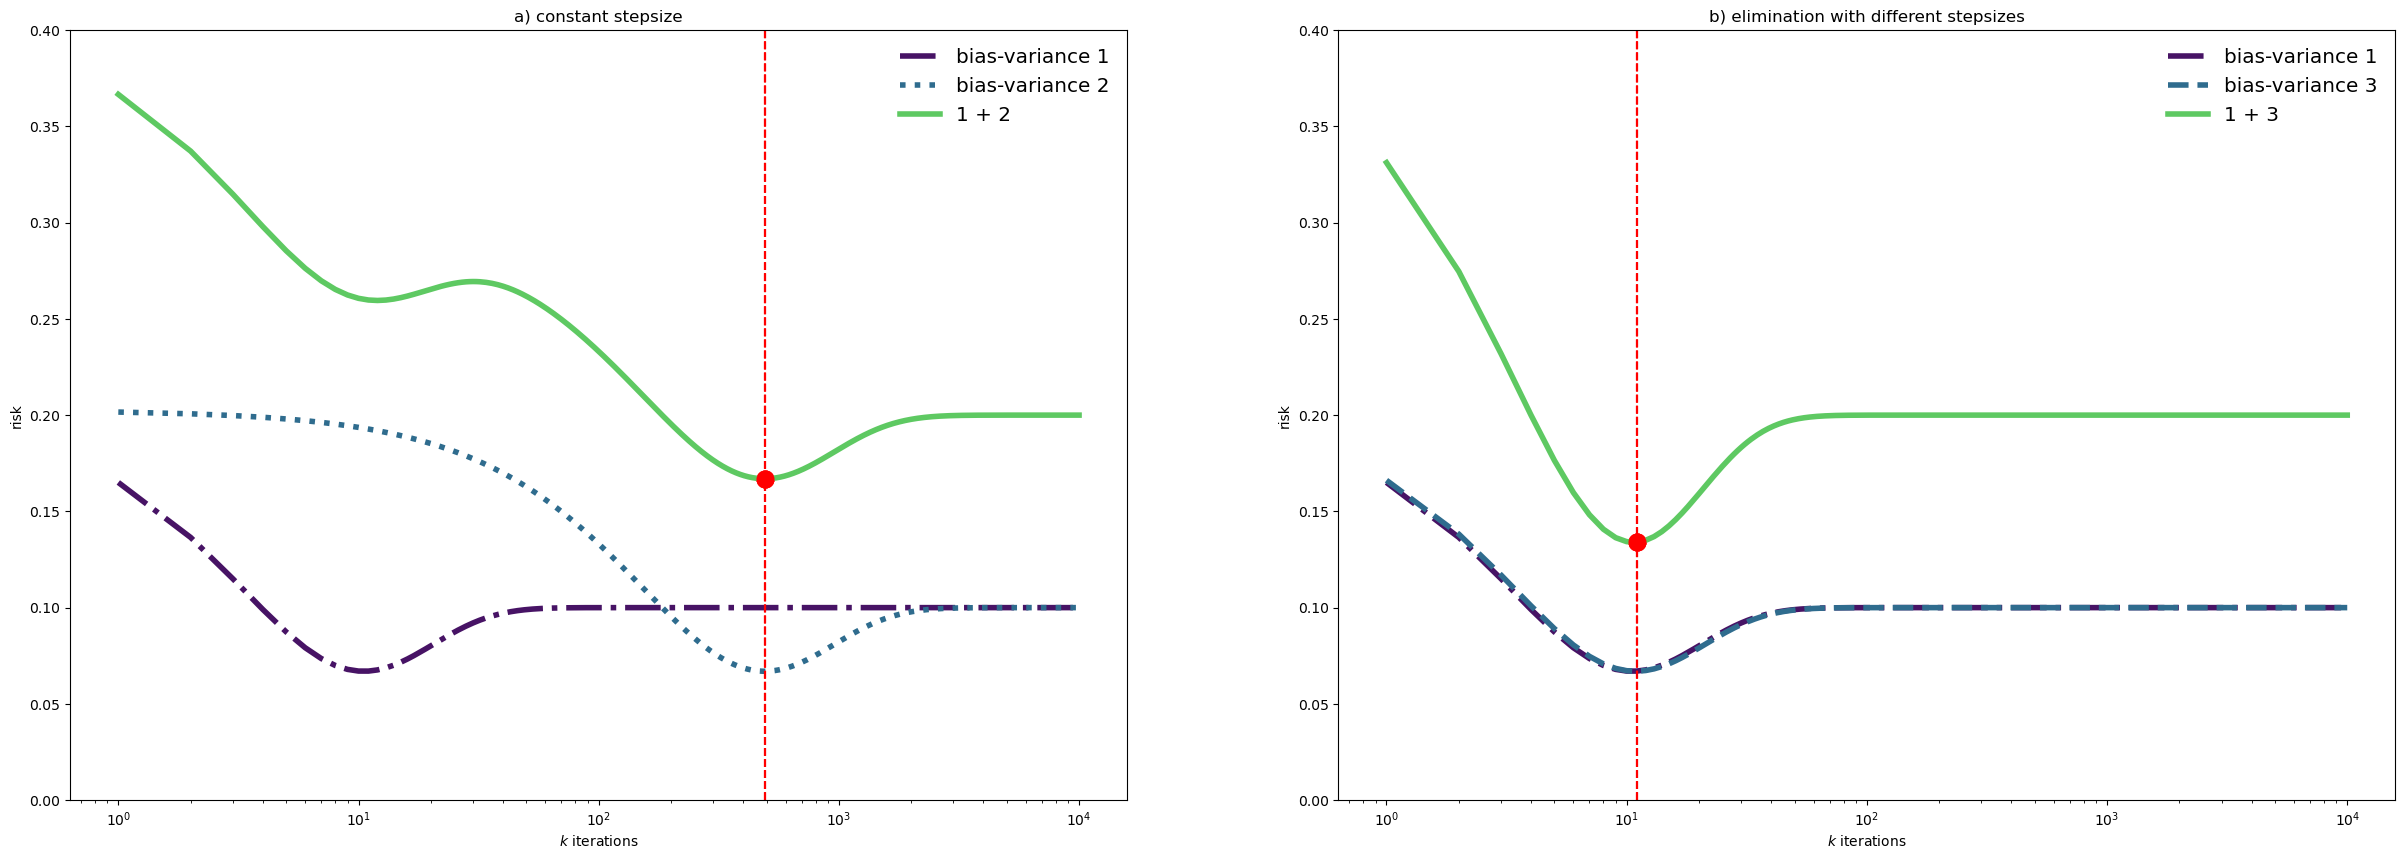

In [3]:
sigma_noise = 1.0
kmax = 10000
dm = 1

s1 = 1.0
t1 = 1.5

s2 = 0.15
t2 = 10.0

sigmas1 = np.array([s1]*dm)
thetas1 = np.array( [t1]*dm)*0.3
sigmas2 = np.array([s2]*dm)
thetas2 = np.array([t2]*dm)*0.3

sigmas = np.hstack( (sigmas1 , sigmas2) ) 
thetas = np.hstack( (thetas1 , thetas2) ) 

n = len(thetas)*5
stepsize = 0.05

risks1 = np.array([risk(thetas1,sigmas1,len(thetas)*stepsize,k,sigma_noise,n) for k in range(1,kmax+1)])
risks2 = np.array([risk(thetas2,sigmas2,len(thetas)*stepsize,k,sigma_noise,n) for k in range(1,kmax+1)])
risks22 = np.array([risk(thetas2,sigmas2,len(thetas)*stepsize*43,k,sigma_noise,n) for k in range(1,kmax+1)])


riskssum = risks1 + risks2
risksnewsum = risks1+risks22

cmap = matplotlib.cm.get_cmap('viridis')
colorList = [cmap(50/1000), cmap(350/1000), cmap(750/1000)]
lsList = ['dashdot', 'dotted', 'solid']
lsList2 = ['dashdot', 'dashed', 'solid']
labelList = ['bias-variance 1', 'bias-variance 2', '1 + 2']
labelList2 = ['bias-variance 1', 'bias-variance 3', '1 + 3']

fig = plt.figure(figsize=(30,10))
ax = plt.subplot(121)
ax.set_xscale('log')
cur_min = np.argmin(riskssum) + 1
for i, cur_ve in enumerate([r-n for r, n in 
            zip([risks1, risks2, riskssum], 
                [sigma_noise**2, sigma_noise**2, 2*sigma_noise**2])]):
    ax.plot(range(1, kmax+1), cur_ve, 
            color=colorList[i], 
            label=labelList[i],
            linestyle=lsList[i], 
            lw=4)
    ax.axvline(cur_min, color='red', linestyle='dashed')
    ax.plot(cur_min, (riskssum - 2*sigma_noise**2)[cur_min-1], 'ro', 
             markersize=12) 
ax2 = plt.subplot(122)
ax2.set_xscale('log')
cur_min = np.argmin(risksnewsum) + 1
for i, cur_ve in enumerate([r-n for r, n in 
            zip([risks1, risks22, risksnewsum], 
                [sigma_noise**2, sigma_noise**2, 2*sigma_noise**2])]):
    ax2.plot(range(1, kmax+1), cur_ve, 
            color=colorList[i], 
             label=labelList2[i],
            linestyle=lsList2[i], 
             lw=4)
    ax2.axvline(cur_min, color='red', linestyle='dashed')
    ax2.plot(cur_min, (risksnewsum - 2*sigma_noise**2)[cur_min-1], 'ro', 
             markersize=12) 


axList = [ax, ax2]
for cur_ax in axList: cur_ax.legend(loc=1, bbox_to_anchor=(1, 1), fontsize='x-large',
    frameon=False, fancybox=True, shadow=True, ncol=1)
for cur_ax in axList: cur_ax.set_ylim([0, 0.4])
for cur_ax in axList: cur_ax.set_ylabel('risk')
for cur_ax in axList: cur_ax.set_xlabel(r'$k$ iterations')
ax.set_title('a) constant stepsize')
ax2.set_title('b) elimination with different stepsizes')
plt.show()

if save_outputs:
    savemtx_for_logplot( np.array([risks1-sigma_noise**2,risks2-sigma_noise**2,risks-sigma_noise**2]),"risk_separate.dat" )
    mtx = np.array([risks1-sigma_noise**2,risks2-sigma_noise**2,risks22-sigma_noise**2,riskssum - 2*sigma_noise**2,risksnewsum - 2*sigma_noise**2 ] )
    savemtx_for_logplot( mtx,"risk_reconciled.dat" ) 